In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ID = 152
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

152 was run on antibiasR, where R is correct, and L is incorrect

# Load sessions

In [4]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasL = sessions[(sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasL])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
73        152         112    unbiased
74        152         116    unbiased
75        152         121   antibiasR
76        152         128   antibiasR


In [5]:
prefix = []
for x in session_vals:
    if len(str(x))==2:
        pref = '/0000'
    else:
        pref = '/000'
    prefix.append(pref) 

summary = [pd.read_csv(path + prefix[x] + str(session_vals[x]) + '/summary/trial_summary' + str(session_vals[x])+ '.csv') for x in range(len(session_vals))]
#Load all sessions for an animal

[     number  trialType  reward  rEnd  lEnd  Pathlengths  choicePath  \
 0         0          0       1     0     0   104.967014   16.942336   
 1         1          0       1     0     0   105.166902   13.983167   
 2         2          0       1     0     0   115.231824   26.057405   
 3         3          0       1     0     0    98.044108   17.296657   
 4         4          0       1     0     0   114.727458   39.997957   
 5         5          0       1     0     0   114.400923   18.103245   
 6         6          0       1     0     0    95.448929   19.846277   
 7         7          0       1     0     0    92.620908   17.901678   
 8         8          0       1     0     0   103.521794   19.570304   
 9         9          0       1     0     0   103.921531   17.852264   
 10       10          0       1     0     0   103.878275   28.199336   
 11       11          0       1     0     0   101.355117   18.678162   
 12       12          0       1     0     0   106.867780    9.40

In [6]:
mean_trials = np.mean([(len(x))for x in summary])

In [7]:
unbiased_idx = [0,1]
antibias_idx = [2,3]
len(summary[0])

149

In [8]:
summary = [mvr.correctL(x) for x in summary]

# Create dot plot

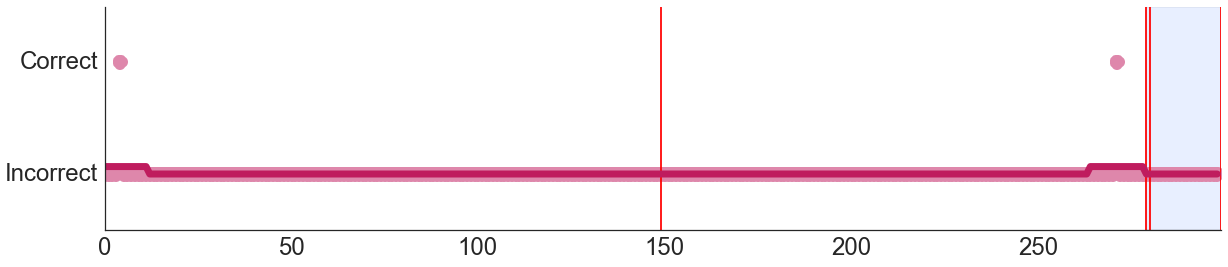

In [9]:
#Plot Correct Track Record across all sessions
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.', color=[0.87,0.53,0.67], markersize=30)
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = [0.7,0.8,1.0], alpha = 0.3)
plt.xlabel('Cumulative Trial #',fontsize = 18.0)
plt.yticks([0,1],['Incorrect','Correct'],fontsize = 24.0)
plt.xticks(fontsize=24.0)
plt.title('Multi-Session Performance - Animal 152',fontsize = 18.0)
sns.despine()

avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs, color=[0.75,0.11,0.37],linewidth=7) 
plt.savefig('152plot.eps', format='eps')

299 299


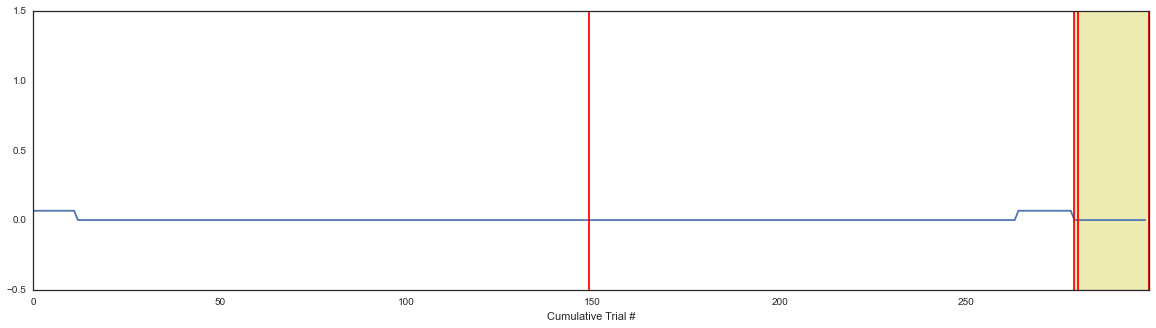

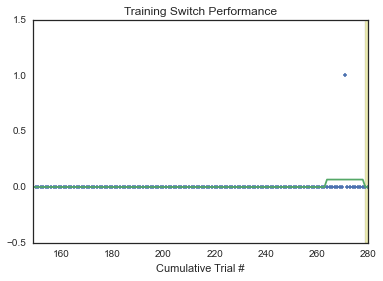

In [10]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')

print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(dot_array,'.')
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.title('Training Switch Performance')
plt.xlabel('Cumulative Trial #')

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg152.csv")



# Plot Animal Performance

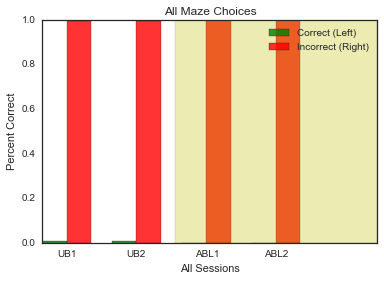

0.00720185854414 0.0


In [11]:
#Plot Correct (R correct, L incorrect)
c = [] #correct/right
for j in range(len(summary)):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ['UB1', 'UB2', 'ABL1', 'ABL2']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

plt.savefig(path+'/allsessions152.jpg')

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:4])

print mu_perc_corrUB_before, mu_perc_corrAB

# Time stats

[12.409557046979872, 13.655430769230769, 121.0, 30.99821052631579]


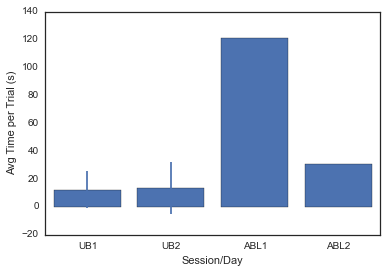

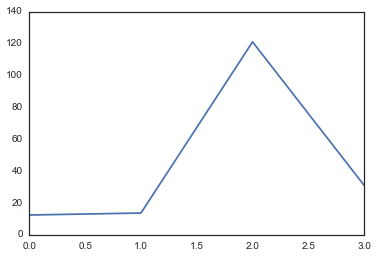

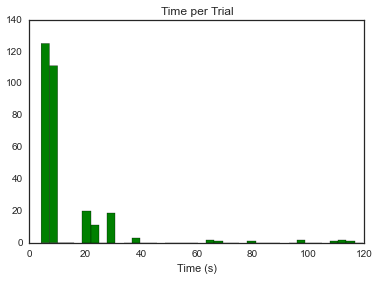

In [12]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)

labels = ['UB1', 'UB2', 'ABL1', 'ABL2']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
plt.plot(mu_time,'-')

plt.figure(3)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[3.998604026845636, 3.5168769230769237, 4.524, 1.8502105263157893]
[12.591784886690462, 14.156656159299825, nan, 3.8746710767775325]


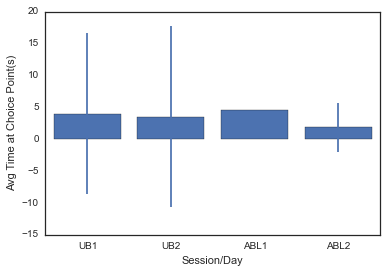

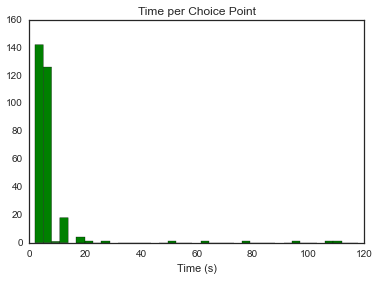

In [13]:
#Time in Choice Point
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            
            

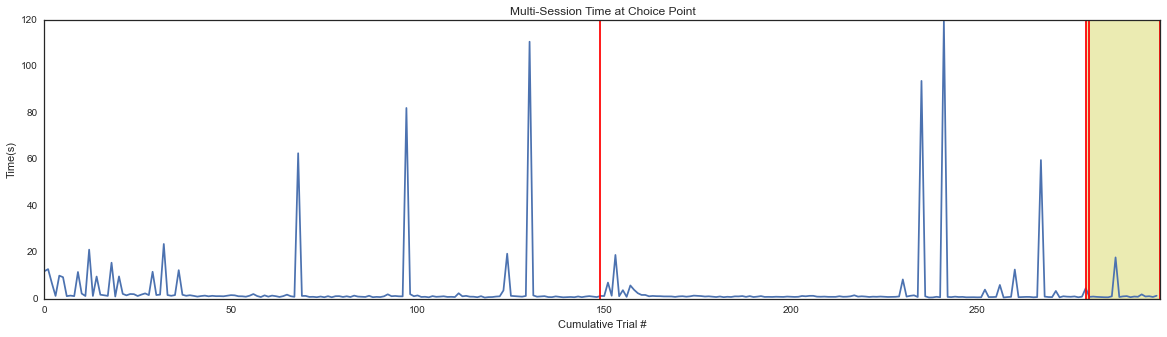

In [14]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

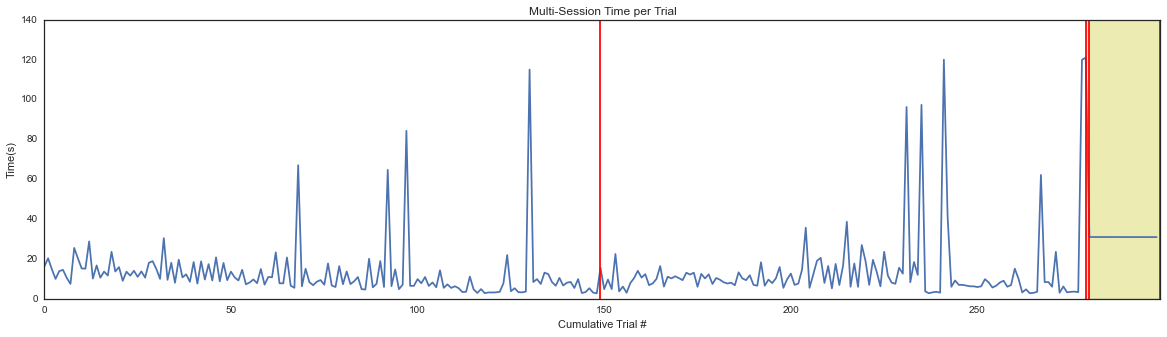

In [15]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')

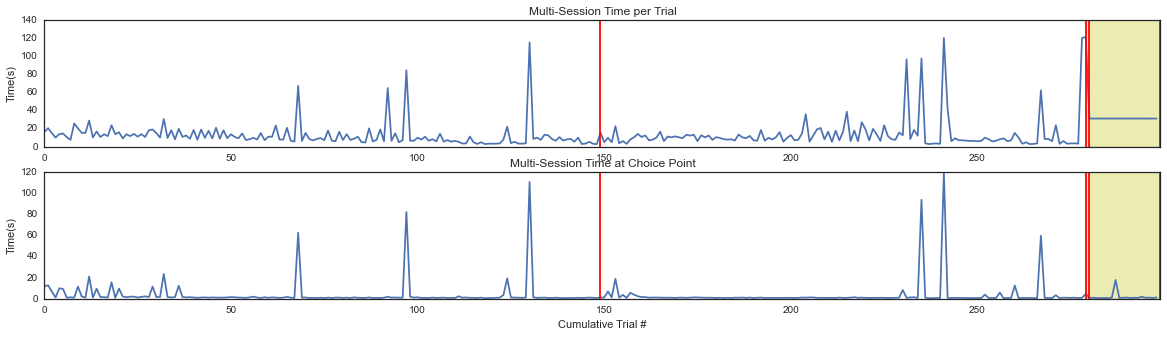

In [16]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


3


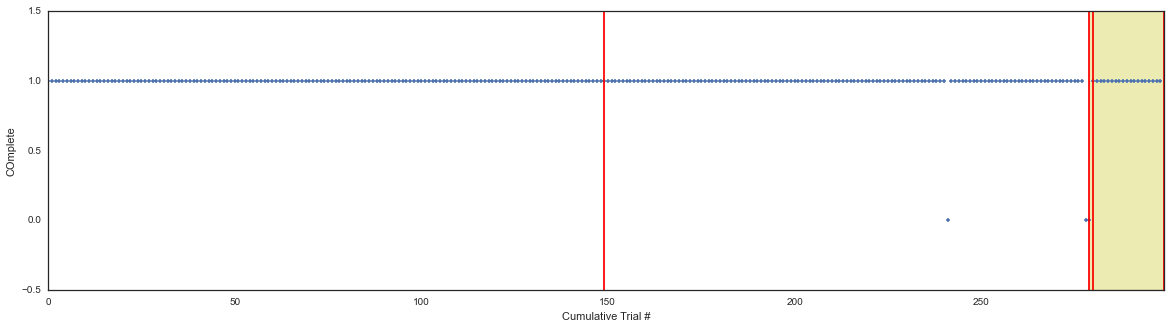

In [17]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Complete')

num_incomplete = completion.count(0)
print num_incomplete

In [18]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)

In [19]:
num_deadend

20

Note: Producing antibias histograms for this animal was very difficult, because the first antibias day contained only 1 trial. The animal's session was aborted after it ran through dead ends. 

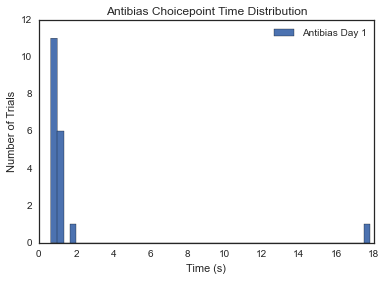

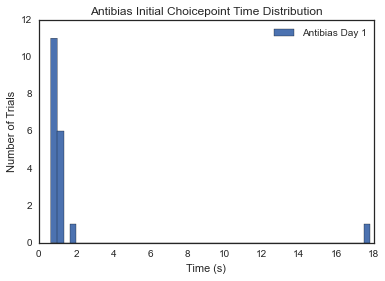

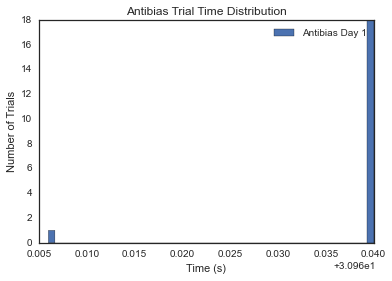

In [24]:
for i in antibias_idx[1:]:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['Antibias Day 2'])
plt.title('Antibias Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx[1:]:
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['Antibias Day 2'])
plt.title('Antibias Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx[1:]:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend([ 'Antibias Day 2'])
plt.title('Antibias Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 




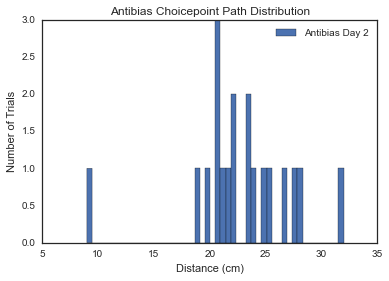

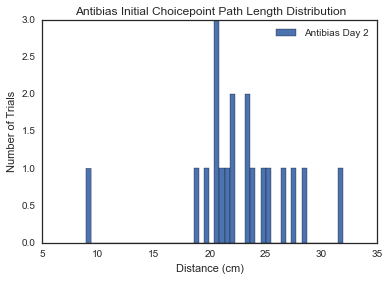

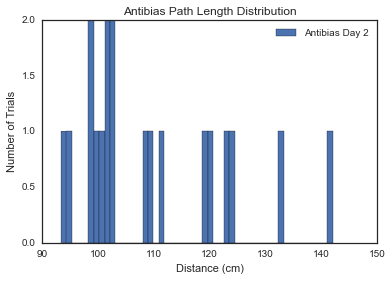

In [32]:
for i in antibias_idx[1:]:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['Antibias Day 2'])
plt.title('Antibias Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx[1:]:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['Antibias Day 2'])
plt.title('Antibias Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx[1:]:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['Antibias Day 2'])
plt.title('Antibias Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

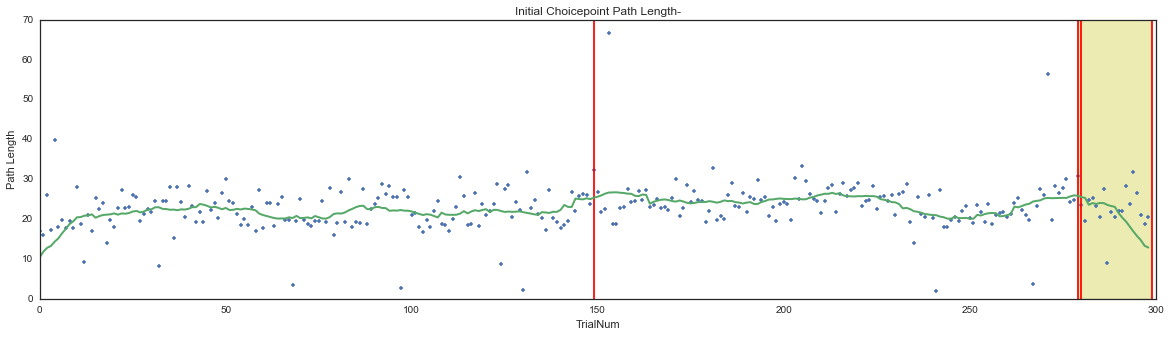

In [33]:
plt.figure(figsize = [20,5])

initpath = []
for i in range(len(summary)):
    initpath = np.append(initpath,summary[i].initChoicePath)

pathavgs = []
binsize = 20
kernel = np.ones(binsize,)/float(binsize)
pathavgs = np.convolve(initpath,kernel, 'same')
   
plt.plot(initpath,'.')
[plt.axvline(x =a, color='r') for a in len_array ]
plt.axvspan(len_array[1],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('TrialNum')
plt.ylabel('Path Length')
plt.title('Initial Choicepoint Path Length-')
plt.plot(pathavgs,'-',linewidth = 2)
    

<type 'numpy.ndarray'>
20
[1, 19]
mean = 3.9978
std= 12.1332331989
median= 0.9965


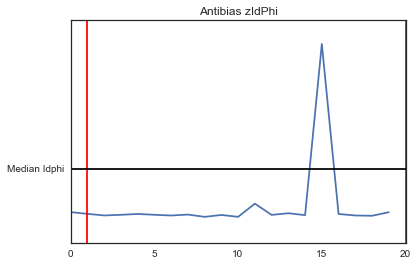

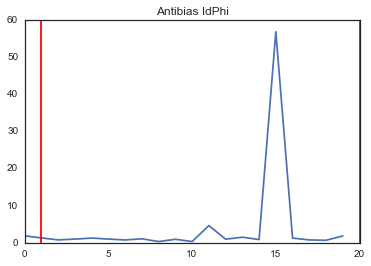

In [26]:
antibias_idphi = []
ab_array = []
print type(summary[2].IdPhi.values)
for i in antibias_idx:
    antibias_idphi = np.append(antibias_idphi,summary[i].IdPhi.values)
    ab_array.append(len(summary[i]))

print len(antibias_idphi)
zidphi_3days = ((antibias_idphi - np.nanmean(antibias_idphi))/float(np.nanstd(antibias_idphi)))
print ab_array
print "mean = "+str(np.nanmean(antibias_idphi))
print "std= " + str(np.nanstd(antibias_idphi))
print "median= " + str(np.nanmedian(antibias_idphi))
    
ab_array = list(np.cumsum(ab_array))

plt.plot(zidphi_3days)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.axhline(y=np.nanmedian(antibias_idphi),color = 'k')
plt.yticks([np.nanmedian(antibias_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(antibias_idphi)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.title('Antibias IdPhi')


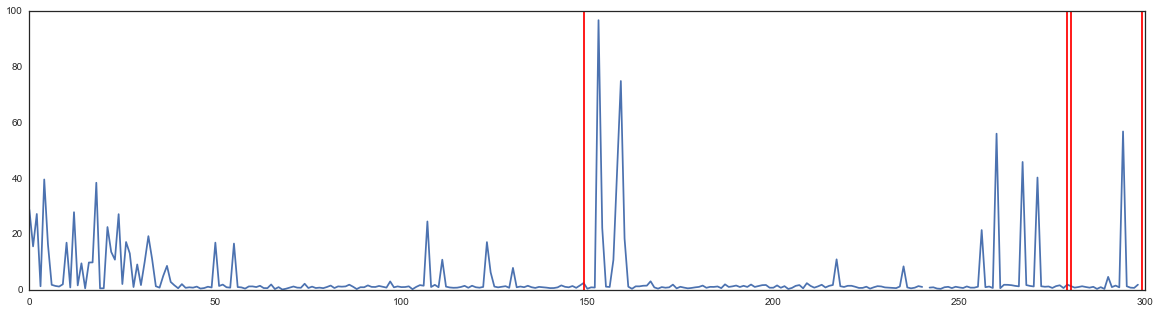

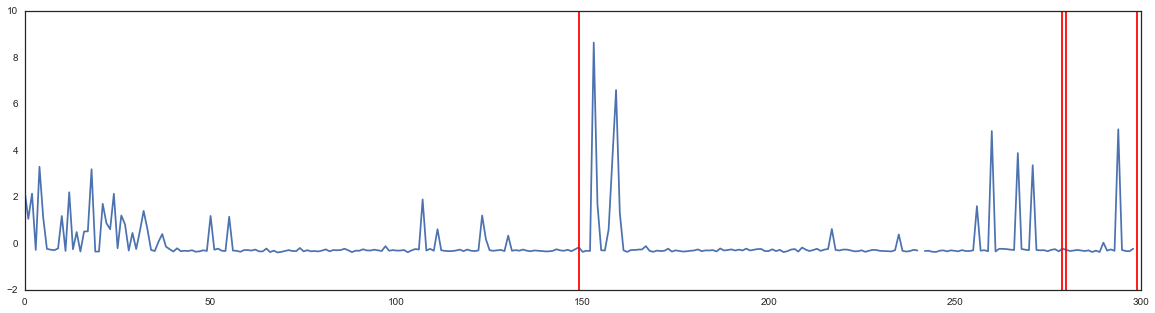

In [27]:
all_idphi = []
all_zidphi = []
for i in range(len(summary)):
    all_idphi = np.append(all_idphi,summary[i].IdPhi.values) 
    
all_zidphi = ((all_idphi - np.nanmean(all_idphi))/float(np.nanstd(all_idphi)))

plt.figure(figsize = [20,5])
plt.plot(all_idphi)
[plt.axvline(x =a, color='r') for a in len_array ]

plt.figure(figsize = [20,5])
plt.plot(all_zidphi)
[plt.axvline(x =a, color='r') for a in len_array ]
        
    

In [28]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :152,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoiceTime': np.nanmean(tchoice_array),
                  'meanIdPhi': np.nanmean(all_idphi),
                  'stdIdPhi' : np.nanstd(all_idphi),
                  'meanAntibiasIdPhi' : np.nanmean(antibias_idphi),
                  'stdAntibiasIdPhi' : np.nanstd(antibias_idphi),
                  'meanzIdPhi' : np.nanmean(all_zidphi),
                  'stdzIdPhi': np.nanstd(all_zidphi),
                  'meanAntibiaszIdphi' : np.nanmean(zidphi_3days),
                  'meanAntibiaszIdPhi' : np.nanstd(zidphi_3days),
                  'medianIdPhi' : np.median(all_idphi),
                  'medianzIdPhi' : np.median(all_zidphi),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB}

In [29]:
animal_summary = pd.Series(animal_summary)

In [30]:
animal_summary.to_csv( path + "/animalsummary152.csv")

In [31]:
animal_summary

Animal                1.520000e+02
correctAntibias       0.000000e+00
correctBefore         7.201859e-03
incomplete            3.000000e+00
meanAntibiasIdPhi     3.997800e+00
meanAntibiaszIdPhi    1.000000e+00
meanAntibiaszIdphi    2.359224e-17
meanChoiceTime        3.654395e+00
meanIdPhi             4.328024e+00
meanNumTrials         7.475000e+01
meanTime              1.449564e+01
meanzIdPhi            4.023627e-17
medianIdPhi           1.099477e+00
medianzIdPhi         -3.018737e-01
numDays               4.000000e+00
stdAntibiasIdPhi      1.213323e+01
stdIdPhi              1.069503e+01
stdzIdPhi             1.000000e+00
totalDeadEnd          2.000000e+01
dtype: float64